# Cylinder Volume

### Model:
* Keras > 3 layer model (25,12,1)

### Callbacks 
* early stop
* print dots

### Data

* X_train (10000, 2)
* Y_train (10000, 1)

* X_test (500, 2)
* Y_test (500, 1)

In [2]:
import warnings
warnings.filterwarnings('ignore')

import random
import pandas as pd
import numpy as np

import tensorflow as tf
import keras

import shutil

import matplotlib.pyplot as plt

Using TensorFlow backend.


### Loading the data

In [3]:
CSV_COLUMNS = ['volume', 'radius', 'height']
FEATURES = CSV_COLUMNS[1:len(CSV_COLUMNS)]
LABEL = CSV_COLUMNS[0]

dfc_train = pd.read_csv('./cyl_train01.csv', header = None, names = CSV_COLUMNS)
dfc_test = pd.read_csv('./cyl_test.csv', header = None, names = CSV_COLUMNS,dtype=np.float64, sep = ',')

In [4]:
X_train = dfc_train[['radius', 'height']]
Y_train = dfc_train[['volume']]
X_test = dfc_test[['radius', 'height']]
Y_test = dfc_test[['volume']]

In [5]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(10000, 2)
(10000, 1)
(500, 2)
(500, 1)


### Model 1
* callback - dots

In [6]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(25, activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(12, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_2 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 400
Trainable params: 400
Non-trainable params: 0
_________________________________________________________________


In [7]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50

In [8]:
history = model.fit(X_train, Y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


..................................................

### Results

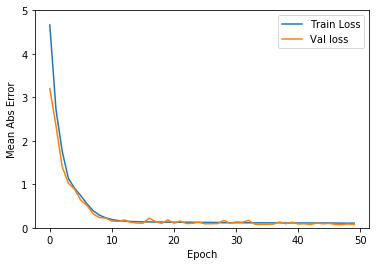

In [9]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])
  
plot_history(history)

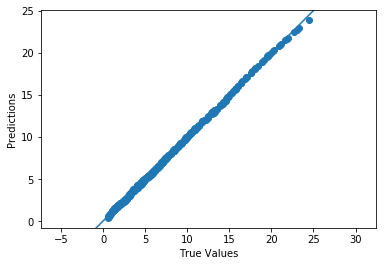

In [10]:
predictions = model.predict(X_test).flatten()
plt.scatter(Y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

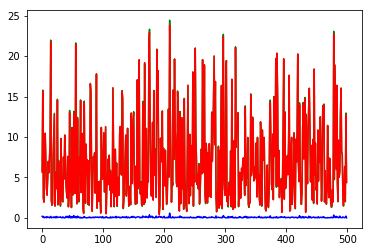

In [11]:
Y_test = np.array(Y_test)
predictions = predictions.reshape(Y_test.shape)
plt.plot(np.abs(Y_test[:,0] - predictions[:,0]), color = 'blue')
plt.plot(Y_test[:,0], color = 'green')
plt.plot(predictions[:,0], color = 'red')

### Model 2 
* callbacks - dots, earlystop

In [12]:
model = build_model()

EPOCHS = 500

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [13]:
history = model.fit(X_train, Y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])


....................................................................................................
............................

### Results

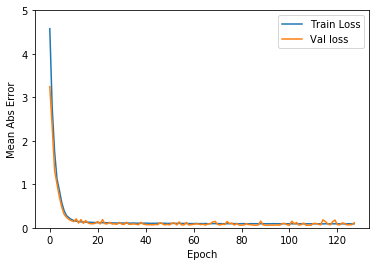

In [14]:
plot_history(history)

In [16]:
[loss, mae] = model.evaluate(X_test, Y_test, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae))

Testing set Mean Abs Error:    0.12


In [17]:
## predictions
predictions = model.predict(X_test).flatten()

In [18]:
predictions

array([ 5.6903853 , 15.423397  ,  2.339042  ,  1.8495891 ,  7.47197   ,
       10.14014   ,  6.963542  ,  3.619051  ,  2.8677988 ,  4.527512  ,
        6.895225  ,  5.5264373 ,  7.2883277 ,  8.957892  , 21.609596  ,
        2.0846155 ,  1.5120357 ,  1.7212868 ,  7.500011  ,  9.957186  ,
       12.803964  ,  1.42521   ,  4.47014   ,  5.526895  ,  3.6455586 ,
       14.382634  ,  1.5939388 ,  7.169534  ,  3.1678677 ,  3.430431  ,
        1.5372407 ,  9.443816  ,  4.1453047 ,  1.9604948 ,  1.9071743 ,
        7.2807994 ,  4.736808  , 10.056414  ,  7.8947406 ,  4.338155  ,
        3.135177  ,  2.4817822 ,  7.450902  ,  1.3287143 ,  2.5009556 ,
       13.041573  ,  3.1490338 ,  6.9828973 ,  1.2477283 , 10.971965  ,
        2.77226   ,  6.8700886 , 12.938206  ,  6.165427  ,  3.0975368 ,
       21.423183  ,  7.1247773 ,  1.6571102 , 12.3099985 ,  3.639084  ,
        1.9396853 ,  7.281058  ,  6.955531  , 14.457102  ,  3.069595  ,
        8.293048  , 10.286328  ,  1.150251  ,  0.576007  , 14.20